# Generate Synthetic Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
def generate_data(n=50, noise = 5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    solpe = 3
    intercept = 8
    noise = np.random.randn(n)*noise
    y = solpe * X + intercept + noise
    return X, y

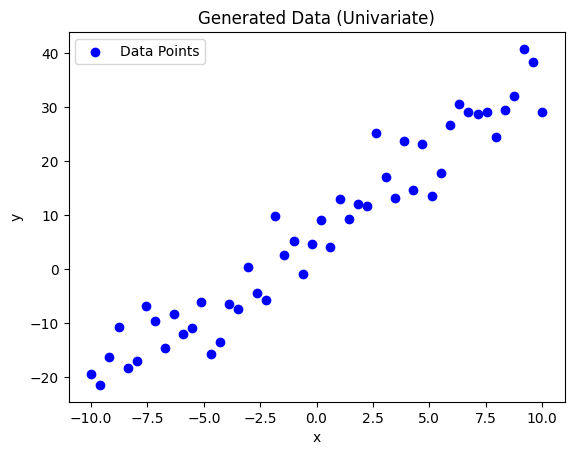

In [103]:
X, y = generate_data()
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Analytical Method

In [104]:
def param_selection(n=50, X=None, Y=None):
    w_1 = float((n*np.sum(X*Y) - np.sum(X)*np.sum(Y) )/(n*np.sum(X**2) - np.sum(X)**2))
    w_0 = float((np.sum(Y)- w_1*np.sum(X))/n)
    return w_0, w_1
def h(w_0, w_1, X):
    return w_0 + w_1*X

In [105]:
X, Y = generate_data()

In [106]:
w_0, w_1 = param_selection(X=X, Y=Y)

In [107]:
w_0, w_1

(6.8726304737193, 2.8550415012704433)

In [108]:
y_pred = h(w_0 = w_0, w_1 = w_1, X = X)

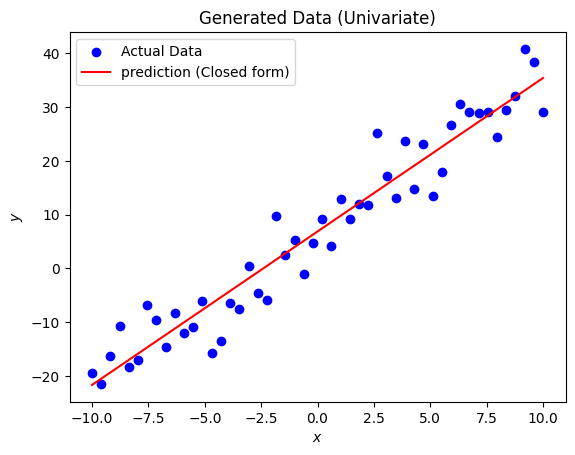

In [109]:
plt.scatter(X, Y, c='b', label = 'Actual Data')
plt.plot(X, y_pred, c='r', label = 'prediction (Closed form)')
plt.legend()
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

# pseudo-inverse of the matrix (X)

In [111]:
X_b = np.c_[np.ones((len(X), 1)), X]

In [112]:
X_b

array([[  1.        , -10.        ],
       [  1.        ,  -9.59183673],
       [  1.        ,  -9.18367347],
       [  1.        ,  -8.7755102 ],
       [  1.        ,  -8.36734694],
       [  1.        ,  -7.95918367],
       [  1.        ,  -7.55102041],
       [  1.        ,  -7.14285714],
       [  1.        ,  -6.73469388],
       [  1.        ,  -6.32653061],
       [  1.        ,  -5.91836735],
       [  1.        ,  -5.51020408],
       [  1.        ,  -5.10204082],
       [  1.        ,  -4.69387755],
       [  1.        ,  -4.28571429],
       [  1.        ,  -3.87755102],
       [  1.        ,  -3.46938776],
       [  1.        ,  -3.06122449],
       [  1.        ,  -2.65306122],
       [  1.        ,  -2.24489796],
       [  1.        ,  -1.83673469],
       [  1.        ,  -1.42857143],
       [  1.        ,  -1.02040816],
       [  1.        ,  -0.6122449 ],
       [  1.        ,  -0.20408163],
       [  1.        ,   0.20408163],
       [  1.        ,   0.6122449 ],
 

In [113]:
np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

array([6.87263047, 2.8550415 ])